In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [6]:
data = pd.read_csv(r"C:\Users\visha\Downloads\drive-download-20230322T130523Z-001\Walmart (1).csv")

In [396]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [397]:
data.shape

(6435, 8)

In [398]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [399]:
data['Store'].nunique()

45

In [400]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [401]:
data['Date'].min()

'01-04-2011'

In [402]:
data['Date'].max()

'31-12-2010'

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [406]:
data['Date'].min()

Timestamp('2010-01-10 00:00:00')

In [407]:
data['Date'].max()

Timestamp('2012-12-10 00:00:00')

In [408]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [409]:
data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

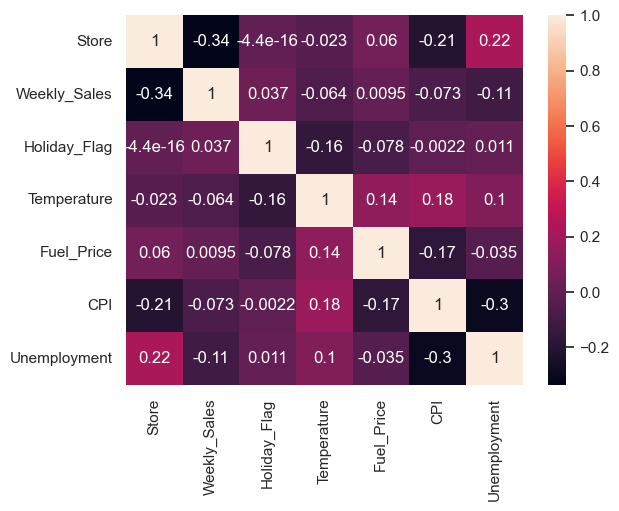

In [410]:
sns.heatmap(data.corr(),annot=True)

In [411]:
data.sort_values(by='Weekly_Sales',ascending=False).head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795


1.) From the above insight, the top 5 weekly sales performing stores are 14,20,10,4,13.

2.) Store number 14 being the highest weekly sale performer in the year 2010.

3.) Store number 4 being the highest weekly sale performer in the year 2011.

In [412]:
data.sort_values(by='Weekly_Sales',ascending=True).head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,2010-03-12,209986.25,0,52.82,3.041,126.731333,9.265
4614,33,2010-10-29,213538.32,0,71.34,3.130,126.436419,9.265
4675,33,2011-12-30,215359.21,1,51.60,3.428,130.071032,8.010
4623,33,2010-12-31,219804.85,1,52.91,3.148,127.087677,9.265
4671,33,2011-02-12,220060.35,0,59.12,3.701,129.845967,8.010


1.) store number 33 is the poor weekly performer in the year 2010 and 2011.

2.) Sales were poor in the 10th,43th,52th week of 2010.

3.) Sales were poor in the 6th and 52th week of 2011.

In [413]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [414]:
total_sale_store = data.groupby('Store').sum().reset_index()


In [415]:
total_sale_store.sort_values(by='Weekly_Sales',ascending=False)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
19,20,3.013978e+08,10,7929.55,488.718,29892.452680,1054.112
3,4,2.995440e+08,10,8902.23,460.027,18401.192733,852.951
13,14,2.889999e+08,10,8264.11,488.718,26638.851959,1236.771
12,13,2.865177e+08,10,7678.69,469.919,18401.192733,1001.261
1,2,2.753824e+08,10,9754.94,460.417,30837.422420,1090.210
9,10,2.716177e+08,10,10330.49,511.357,18401.192733,1195.904
26,27,2.538559e+08,10,8195.49,511.696,19878.613542,1144.250
5,6,2.237561e+08,10,9967.10,460.417,31110.107182,944.787
0,1,2.224028e+08,10,9767.87,460.417,30887.555523,1088.290
38,39,2.074455e+08,10,10095.42,460.417,30706.256907,1125.274


From the above insight.

1.)The performence of a store over the years as follows:

    Top 5 - 20,4,14,13,2
    least 5 - 38,36,5,44,33

Text(0.5, 1.0, 'Sales over the years')

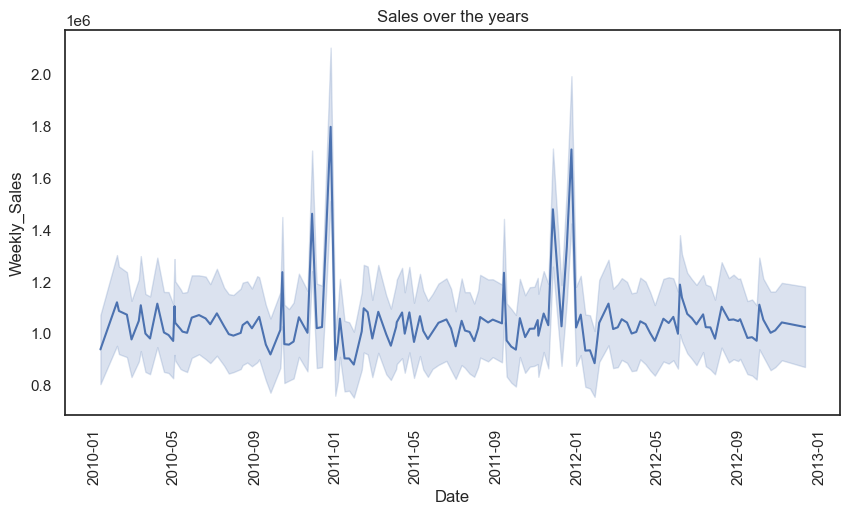

In [416]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data['Date'],y=data['Weekly_Sales'])
plt.xticks(rotation=90)
plt.title('Sales over the years')

In [12]:
data['year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['Week'] = data.Date.dt.week

In [418]:
data.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,Month,Day,Week
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.096358,8.106,2010,5,2,17


<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

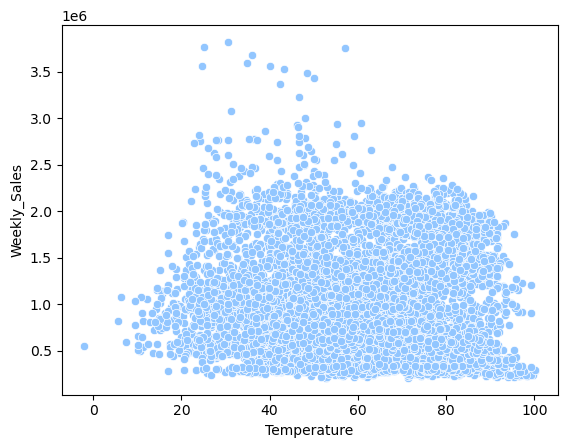

In [703]:
sns.scatterplot(x=data['Temperature'],y=data['Weekly_Sales'])

From the above graph it is observed that:
    
    1.) Lower the temperature, higher the sales.

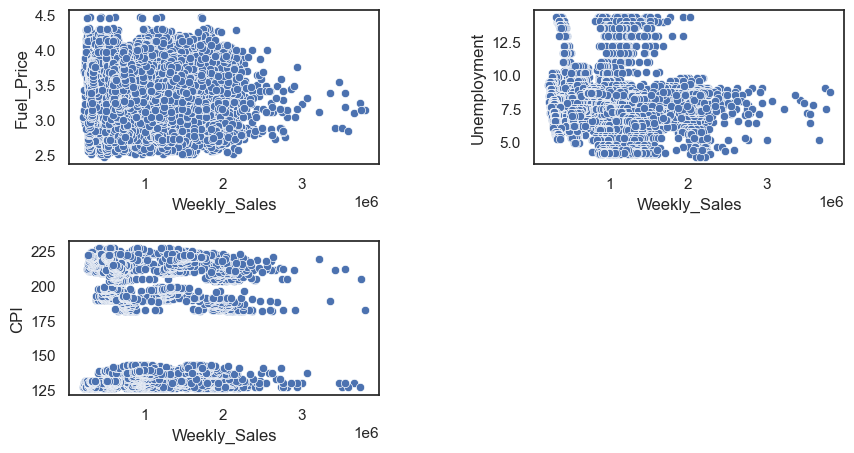

In [420]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.scatterplot(x=data['Weekly_Sales'],y=data['Fuel_Price'])

plt.subplot(2,2,2)
sns.scatterplot(x=data['Weekly_Sales'],y=data['Unemployment'])

plt.subplot(2,2,3)
sns.scatterplot(x=data['Weekly_Sales'],y=data['CPI'])
plt.subplots_adjust(wspace=0.5,hspace=0.5)

From the above Graph:
    
    1.) unemployment rate also affected the sale, higher the unemployment rate lower is the sales.
    2.) Higher the Fuel Prices lower is the sales.

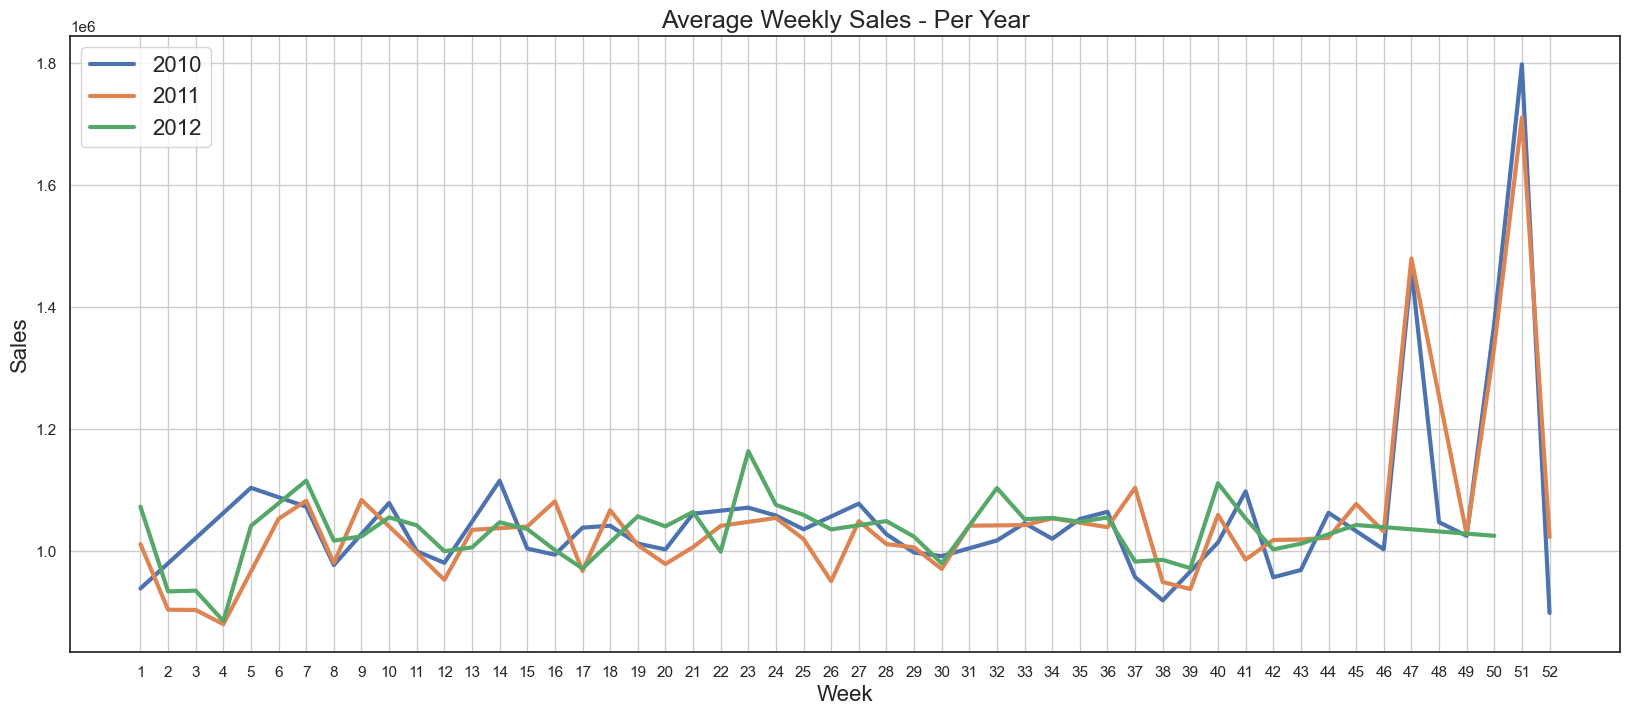

In [421]:
sales_2010 = data[data['year']==2010]['Weekly_Sales'].groupby(data['Week']).mean()
sales_2011 = data[data['year']==2011]['Weekly_Sales'].groupby(data['Week']).mean()
sales_2012 = data[data['year']==2012]['Weekly_Sales'].groupby(data['Week']).mean()
plt.figure(figsize=(20,8))
plt.plot(sales_2010.index, sales_2010.values,linewidth=3)

plt.plot(sales_2011.index, sales_2011.values,linewidth=3)
plt.plot(sales_2012.index, sales_2012.values,linewidth=3)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

From the above Graph it is observevd that:
    
    1.) in the 51th week of 2010 and 2011 sales were the highest.
    2.) and gradualy decreasing from the 51st week of 2010 and 2011.
    3.) Sales were moderate in the 23rd week of 2012.
    4.) Sales has stopped in the 50th week of 2012

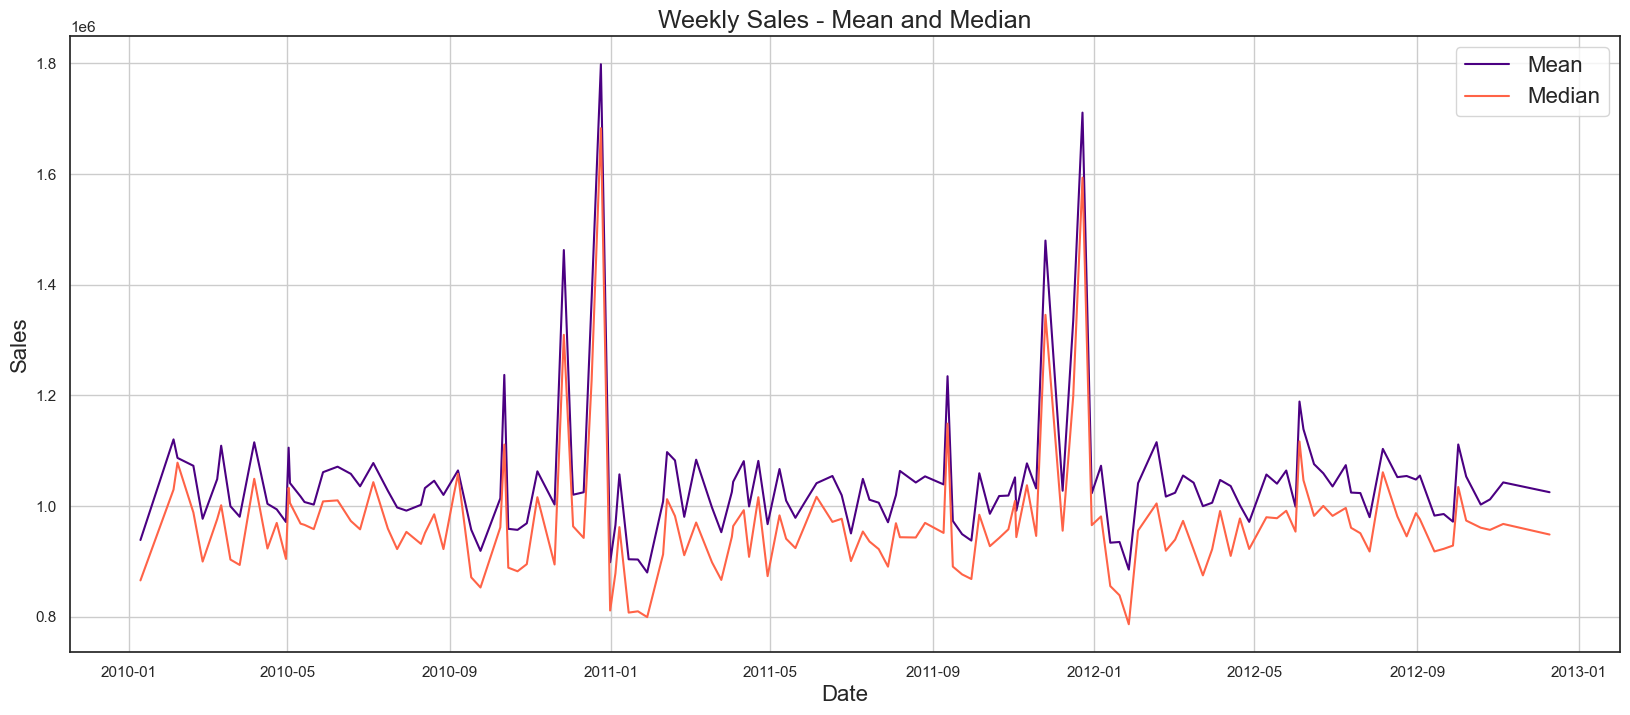

In [422]:
weekly_sales_mean = data['Weekly_Sales'].groupby(data['Date']).mean()
weekly_sales_median = data['Weekly_Sales'].groupby(data['Date']).median()
plt.figure(figsize=(20,8))
plt.plot(weekly_sales_mean.index, weekly_sales_mean.values, color = 'indigo')
plt.plot(weekly_sales_median.index, weekly_sales_median.values, color = 'tomato')
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [423]:
import plotly.express as px

In [585]:
px.histogram(data, x='Temperature', y ='Weekly_Sales', color='Holiday_Flag',marginal='box')

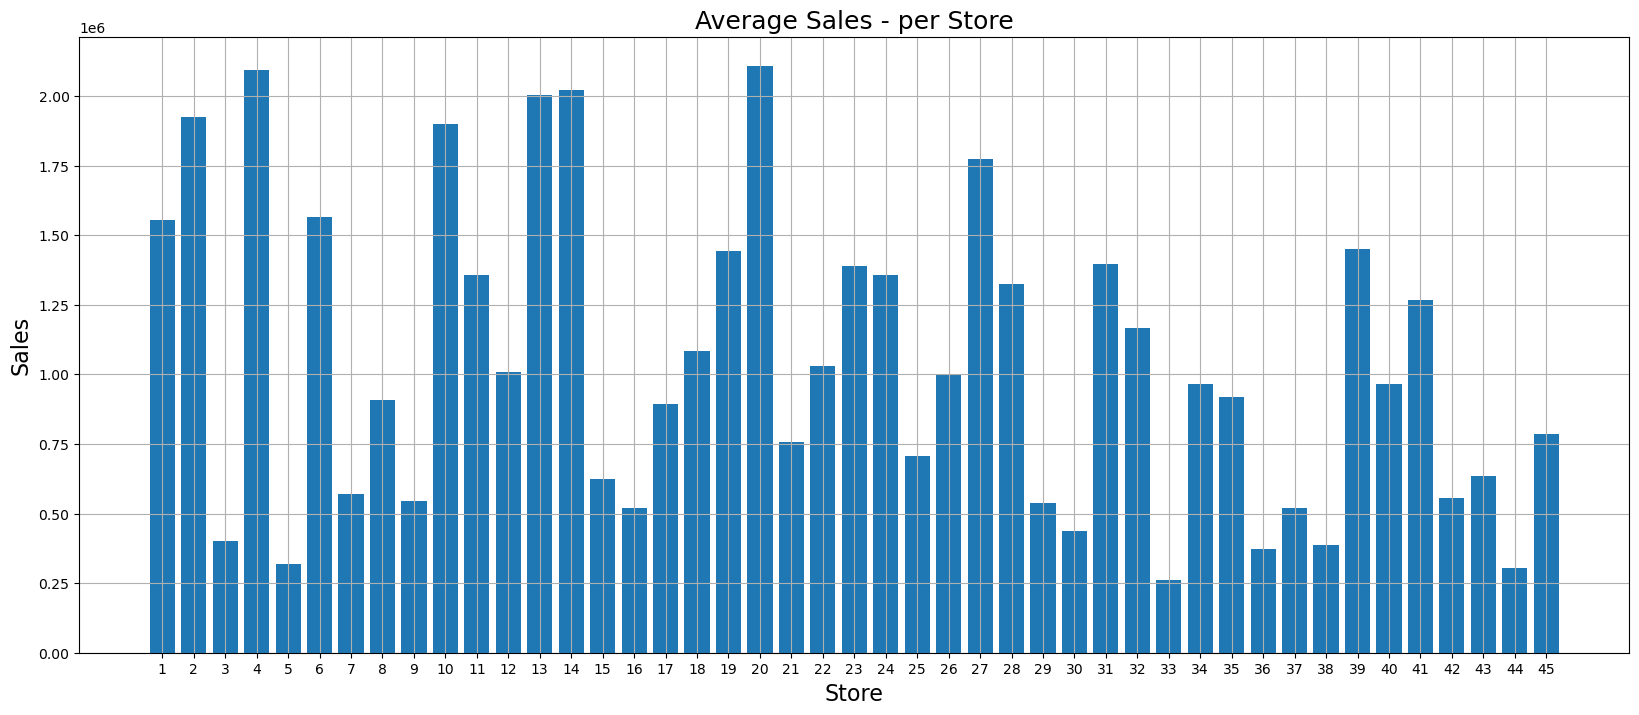

In [425]:
weekly_sales = data['Weekly_Sales'].groupby(data['Store']).mean()
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.bar(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.xticks(np.arange(1,46,step=1))
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()


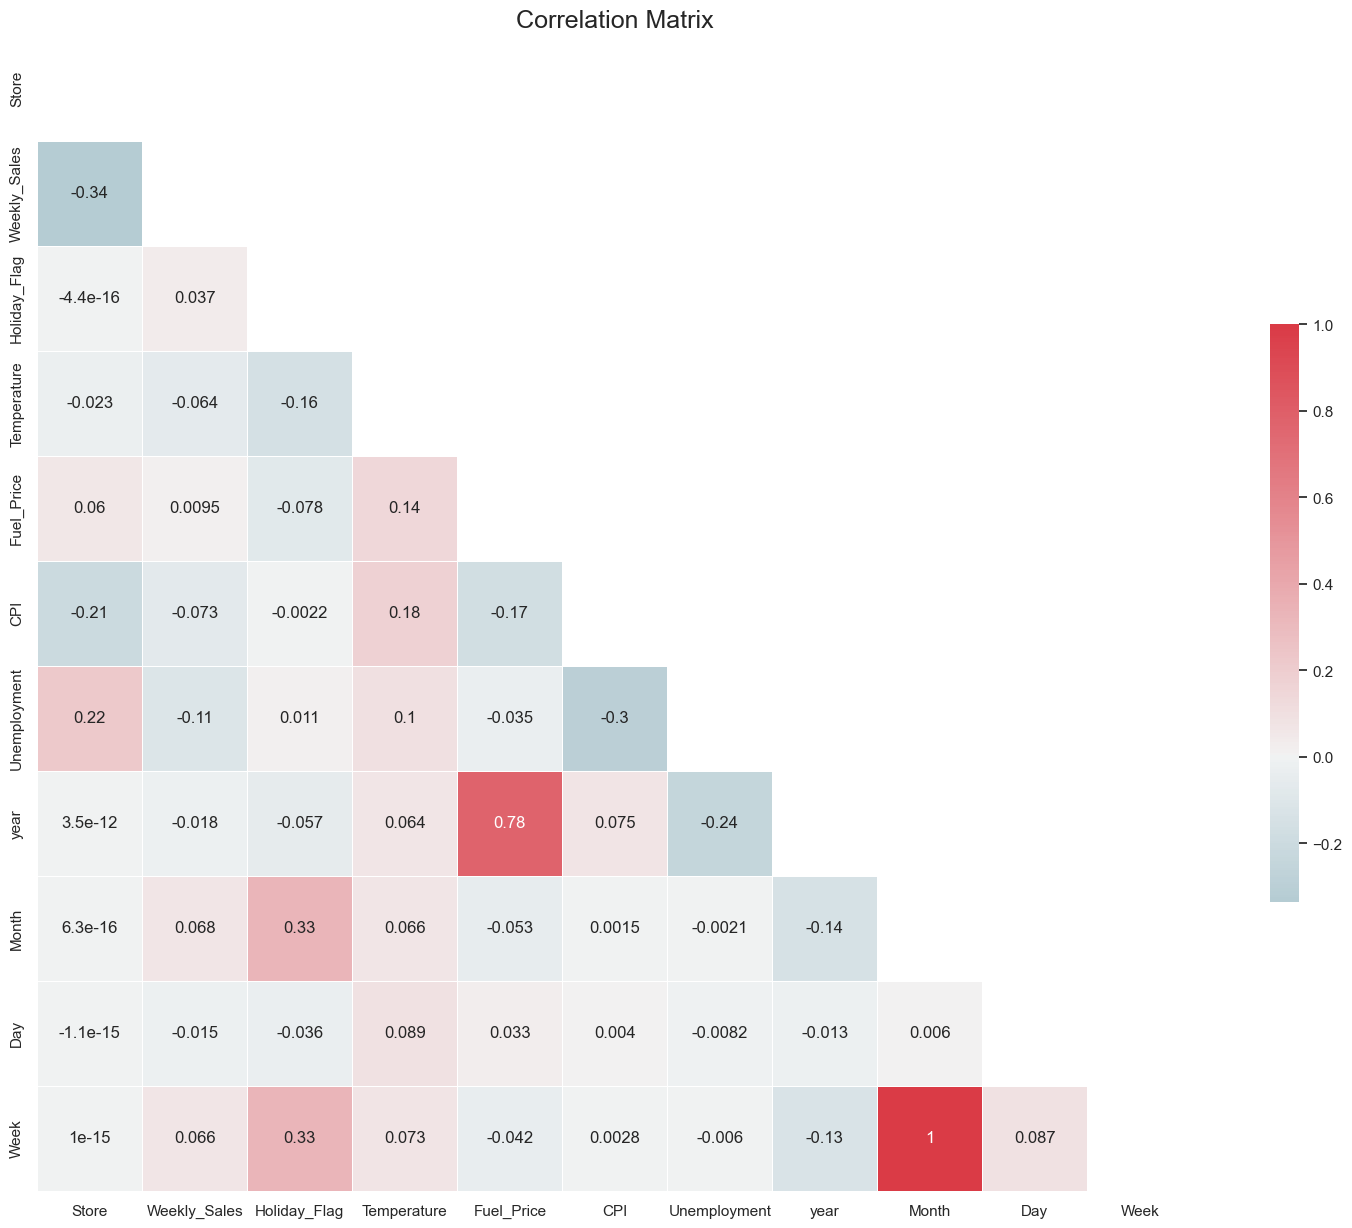

In [426]:
sns.set(style="white")

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [427]:
store_14 = data[data['Store']==14]

In [428]:
store_14.set_index(['Date'],inplace= True)

In [429]:
sales_14 = pd.DataFrame(store_14['Weekly_Sales']).groupby(store_14.index).sum()

In [430]:
sales_14

,Weekly_Sales
Date,
2010-01-10,1855703.66
2010-02-04,2495630.51
2010-02-07,2334788.42
2010-02-19,2204556.70
2010-02-26,2095591.63
...,...
2012-10-08,1648570.03
2012-10-19,1590274.72
2012-10-26,1704357.62


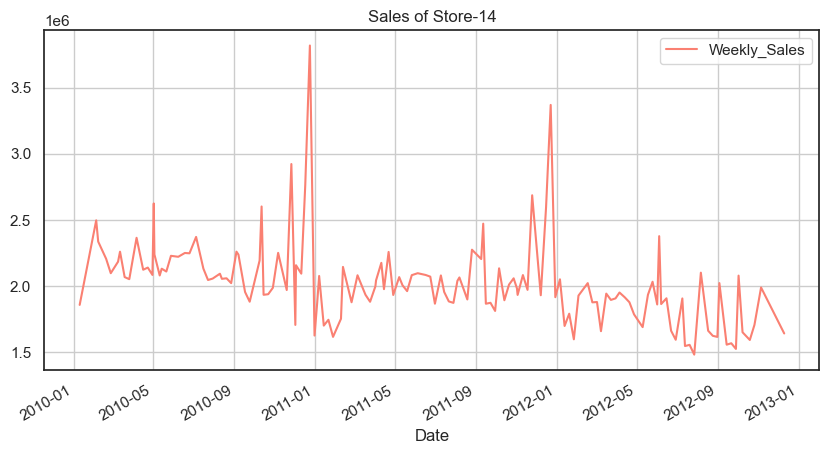

In [431]:
sales_14.plot(figsize=(10,5),color = 'salmon',title = 'Sales of Store-14',grid = True)
plt.show()

In [432]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

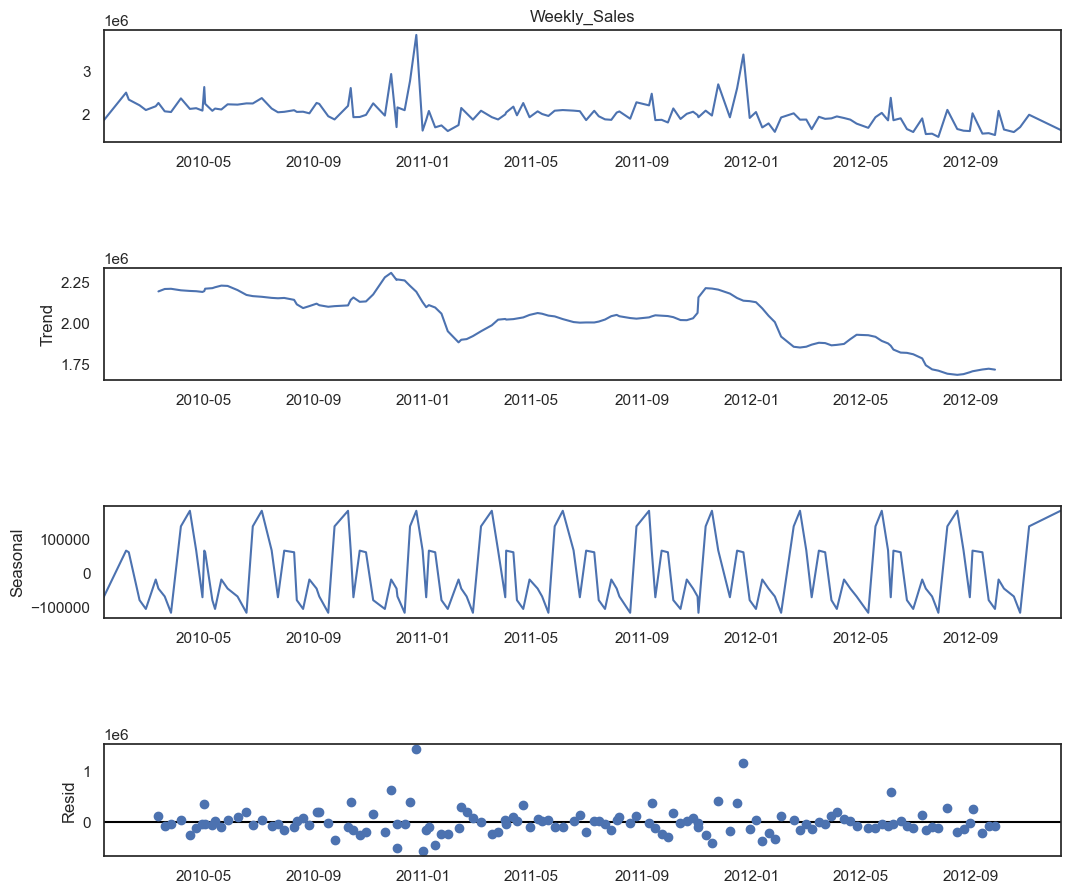

In [433]:
decomposition = seasonal_decompose(sales_14['Weekly_Sales'],period=12)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [434]:
store_33 = data[data['Store']==33]

In [435]:
store_33.set_index('Date',inplace=True)

In [436]:
sales_33 = pd.DataFrame(store_33['Weekly_Sales'].groupby(store_33.index).sum())

<Figure size 640x480 with 0 Axes>

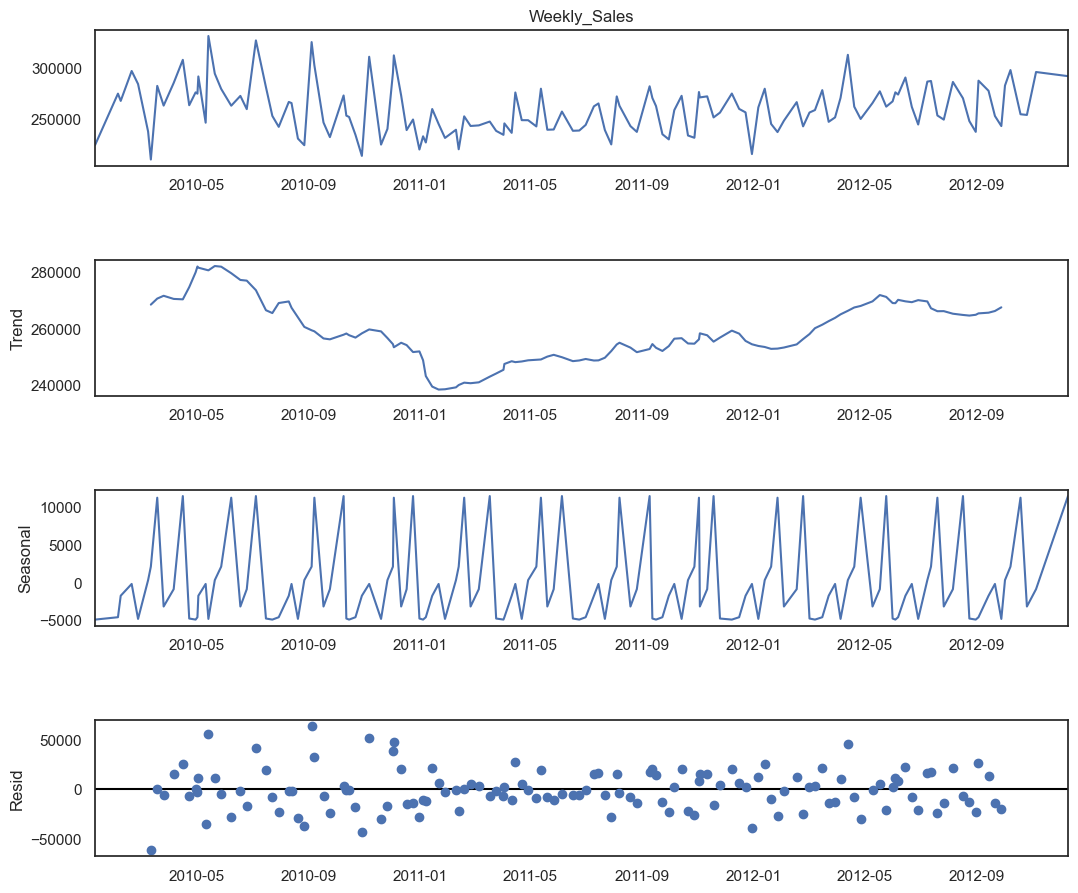

In [437]:
decomposition = seasonal_decompose(sales_33['Weekly_Sales'],period=12)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

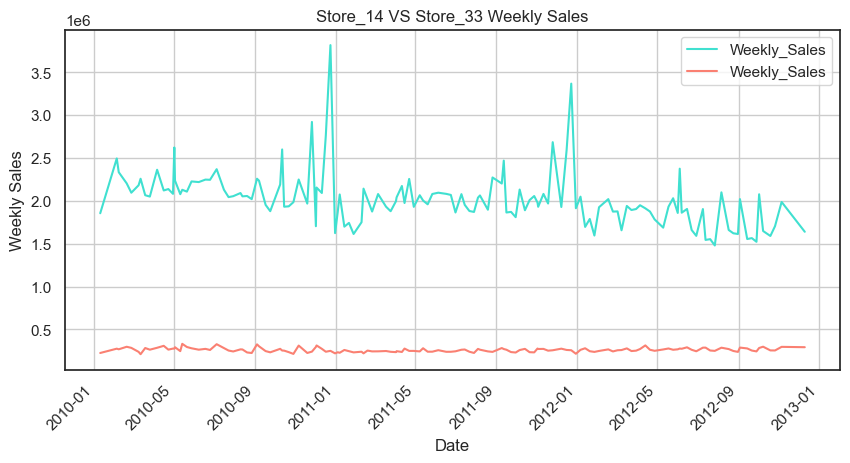

In [438]:
plt.figure(figsize=(10,5))
sales_14['Weekly_Sales'].plot(color='turquoise',legend=True)
sales_33['Weekly_Sales'].plot(color='salmon',legend = True)
plt.title('Store_14 VS Store_33 Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [439]:
store_41 = data[data['Store']==41]

In [440]:
sales_41 = pd.DataFrame(columns=['Weekly_Sales','Date'],data = store_41)

In [441]:
sales_41 = sales_41.sort_index(ascending=True)

<Figure size 640x480 with 0 Axes>

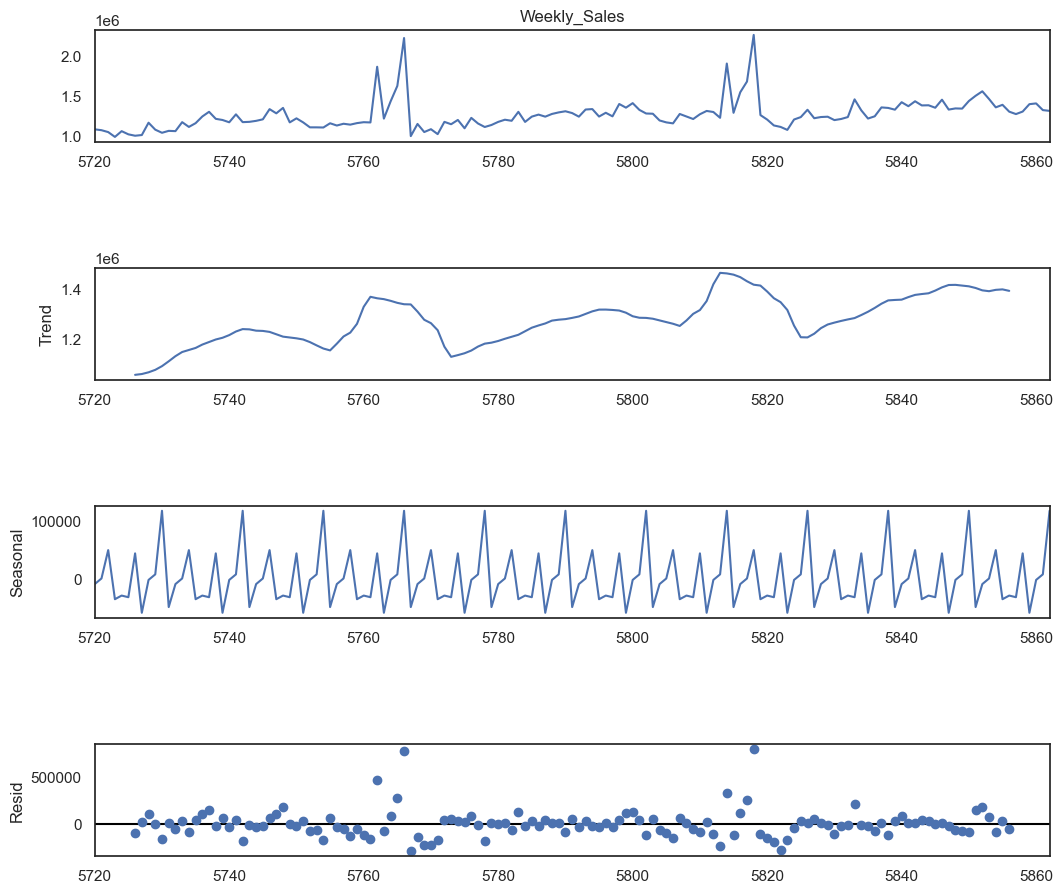

In [442]:
decomposition = seasonal_decompose(sales_41['Weekly_Sales'],period=12)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [443]:
sales_41.set_index('Date',inplace=True)

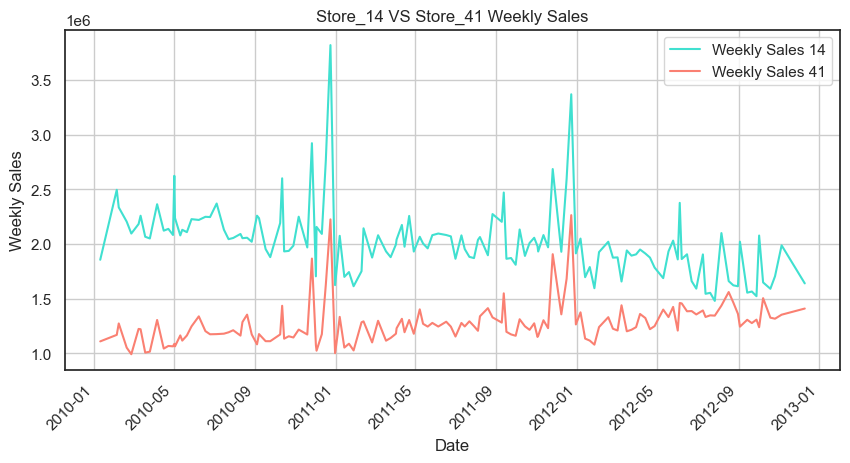

In [444]:
plt.figure(figsize=(10,5))
sales_14['Weekly_Sales'].plot(color='turquoise',label='Weekly Sales 14')
sales_41['Weekly_Sales'].plot(color='salmon',label = 'Weekly Sales 41')
plt.title('Store_14 VS Store_41 Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Axes: ylabel='Holiday_Flag'>

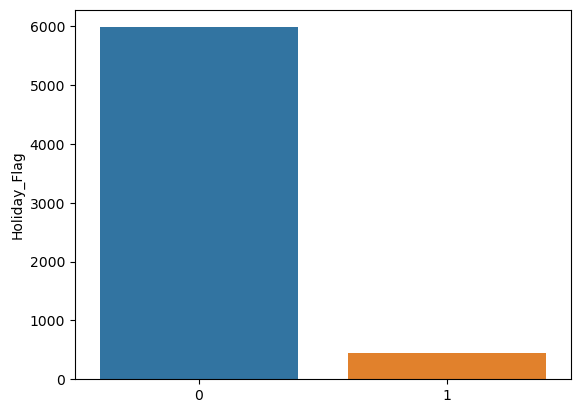

In [37]:
sns.barplot(x=data['Holiday_Flag'].value_counts().index, y=data['Holiday_Flag'].value_counts())


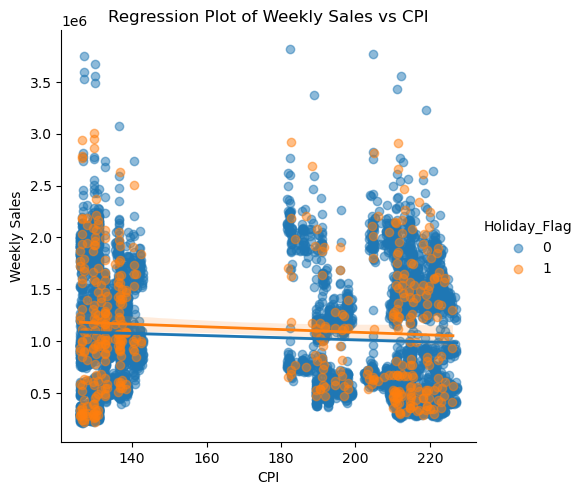

In [9]:
sns.lmplot(x='CPI', y='Weekly_Sales', data=data, hue='Holiday_Flag',scatter_kws={'alpha':0.5}, line_kws={'linewidth':2})
plt.title('Regression Plot of Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show();

In [445]:
sales_41.sort_index(ascending=True,inplace=True)

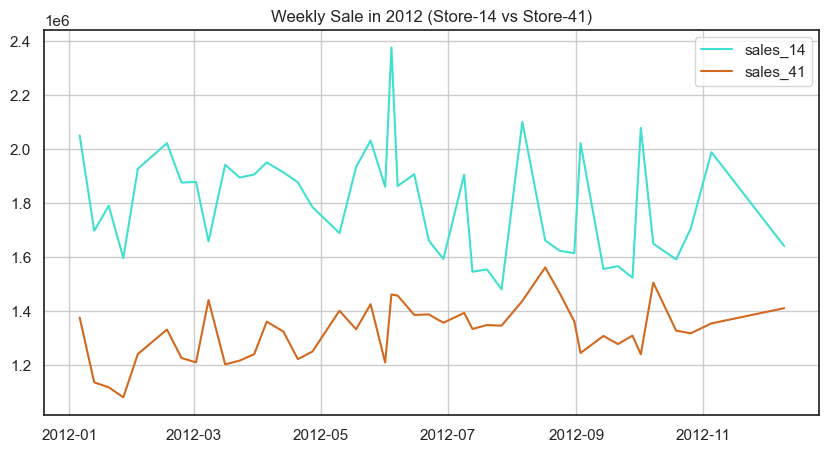

In [446]:
plt.figure(figsize=(10,5))
plt.plot(sales_14['2012'],label = 'sales_14',color='turquoise')
plt.plot(sales_41['2012'],label = 'sales_41',color='chocolate')
plt.legend(loc='best')
plt.title('Weekly Sale in 2012 (Store-14 vs Store-41)')
plt.grid()
plt.show()


Implimenting Time-Series Model

In [96]:
df

,Weekly_Sales
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68
...,...
2012-09-28,713173.95
2012-05-10,733455.07
2012-12-10,734464.36


In [534]:
df = data[['Date','Weekly_Sales']]

In [535]:
df=df.set_index('Date')

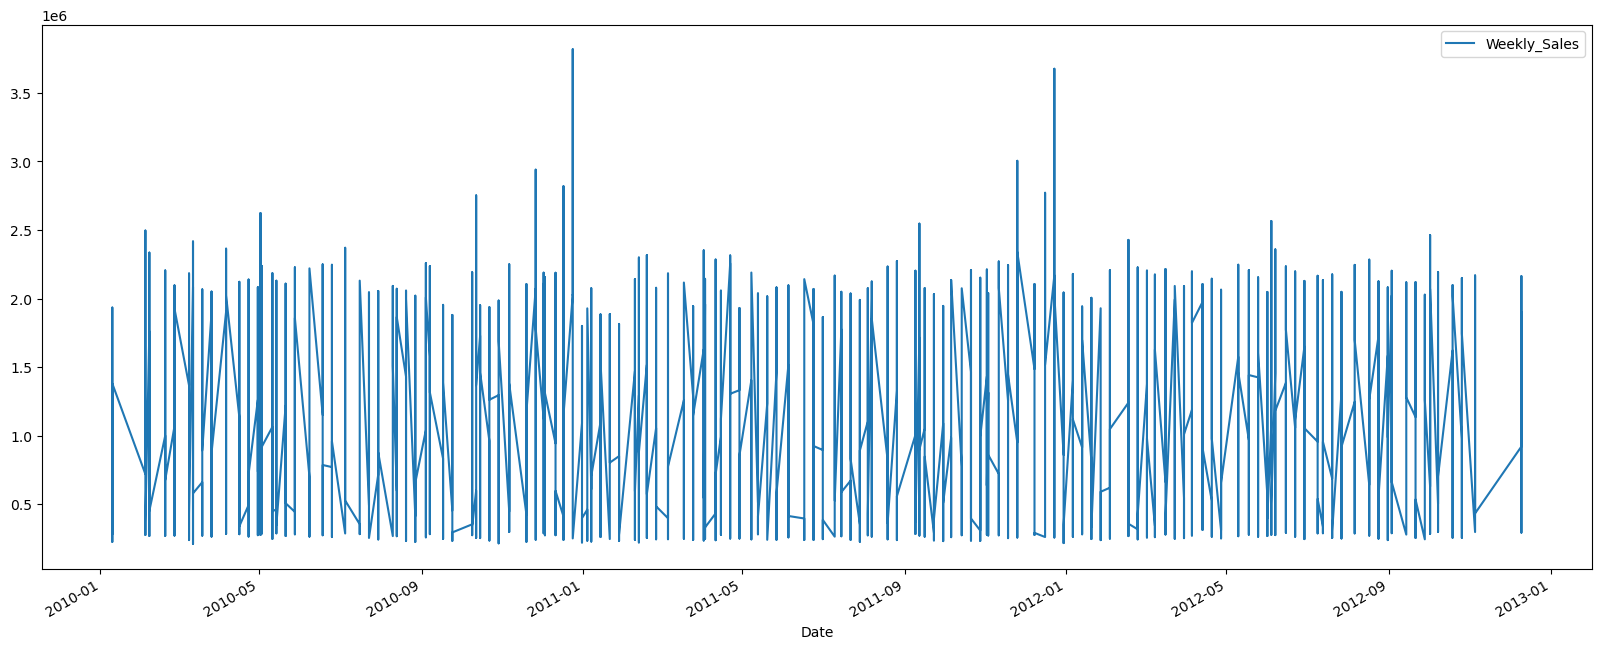

In [41]:
df.plot(figsize=(20,8))
plt.show()

In [89]:
# Checking Whether data is stationary or not

from statsmodels.tsa.stattools import adfuller

def check_stationary(data):
    result = adfuller(data)
    labels=['ADF Stats','pvalue','lags','obs used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print('data is stationary')
    else:
        print('data is non stationary')

In [90]:
check_stationary(df)

ADF Stats:-4.624149498578302
pvalue:0.00011655869699901318
lags:34
obs used:6400
data is stationary


In [94]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [536]:
df_month = df.resample('MS').mean()


In [537]:
df_week = df.resample('W').mean()
df_week = df_week.dropna()
df_week

,Weekly_Sales
Date,
2010-01-10,9.386639e+05
2010-02-07,1.103792e+06
2010-02-21,1.072822e+06
2010-02-28,9.770794e+05
2010-03-14,1.078925e+06
...,...
2012-10-14,1.053410e+06
2012-10-21,1.002720e+06
2012-10-28,1.012091e+06


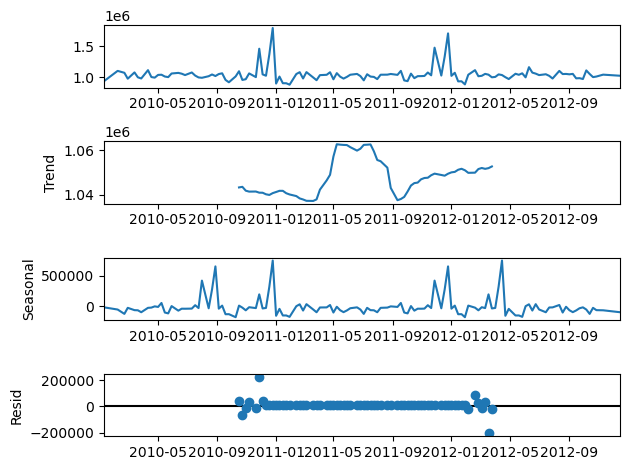

In [338]:
decomposition = seasonal_decompose(df_week,period=60)
decomposition.plot();

In [120]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

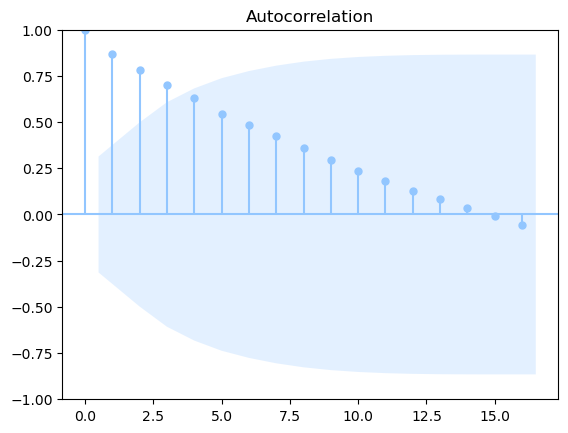

In [543]:
plotting_acf =acf(df)
plot_acf(plotting_acf);

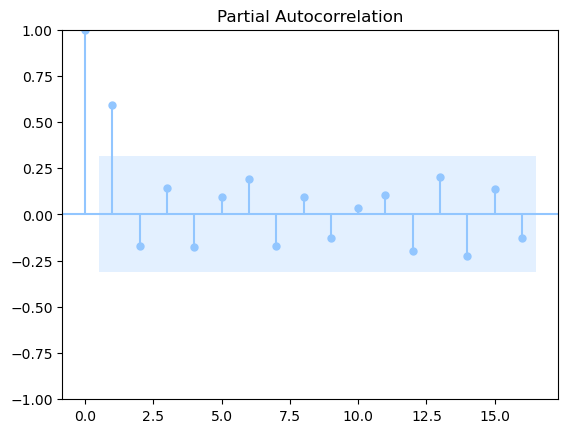

In [544]:
plotting_pacf =pacf(df)
plot_pacf(plotting_pacf);

In [565]:
df.sort_index(inplace=True)

In [571]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [628]:
l = int(0.7*len(df))
train_data = df.iloc[:l]
test_data =df.iloc[l:]

In [634]:
model = sm.tsa.statespace.SARIMAX(train_data,order=(1,0,1),seasonal_order=(1,0,1,12)).fit()

In [635]:
predictions = model.predict(start=len(train_data),end=len(train_data)+len(test_data)-1 ,dynamic=True)

In [643]:
df_sari=pd.DataFrame()
df_sari['actual']=test_data['Weekly_Sales']
df_sari['predictions']=predictions.values


In [644]:
mse = mean_squared_error(df_sari['actual'],df_sari['predictions'])

315751708612.84985

In [645]:
rmse = np.sqrt(mse)
print(f'RMSE : {rmse}')

RMSE : 999.3486671039859


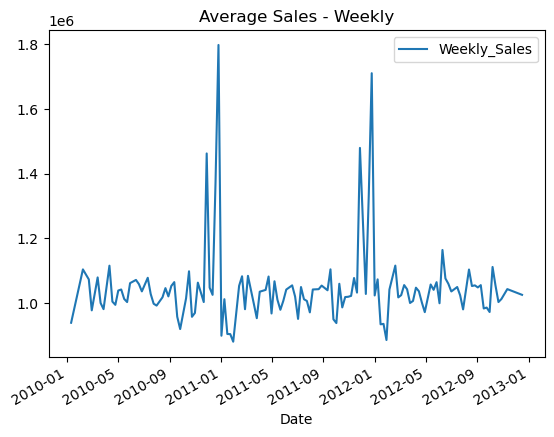

In [128]:
df_week.plot()
plt.title('Average Sales - Weekly')
plt.show()

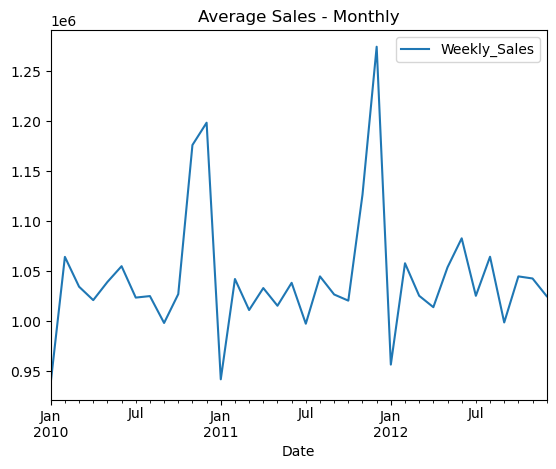

In [126]:
df_month.plot()
plt.title('Average Sales - Monthly')
plt.show()

In [129]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

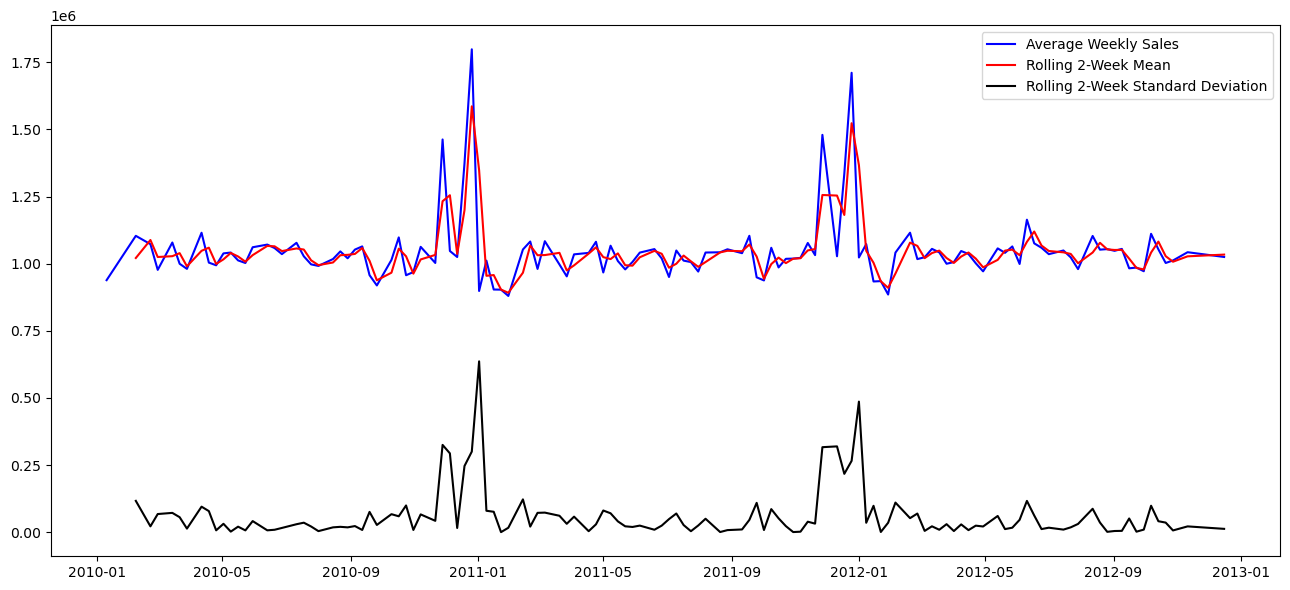

In [130]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [131]:
adfuller(df_week['Weekly_Sales'])

(-9.22535755145085,
 1.735104814518787e-15,
 0,
 126,
 {'1%': -3.4833462346078936,
  '5%': -2.8847655969877666,
  '10%': -2.5791564575459813},
 2981.1749849332523)

# Train - Test Split of Weekly Data

In [158]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (88, 1)
Test: (39, 1)


In [159]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

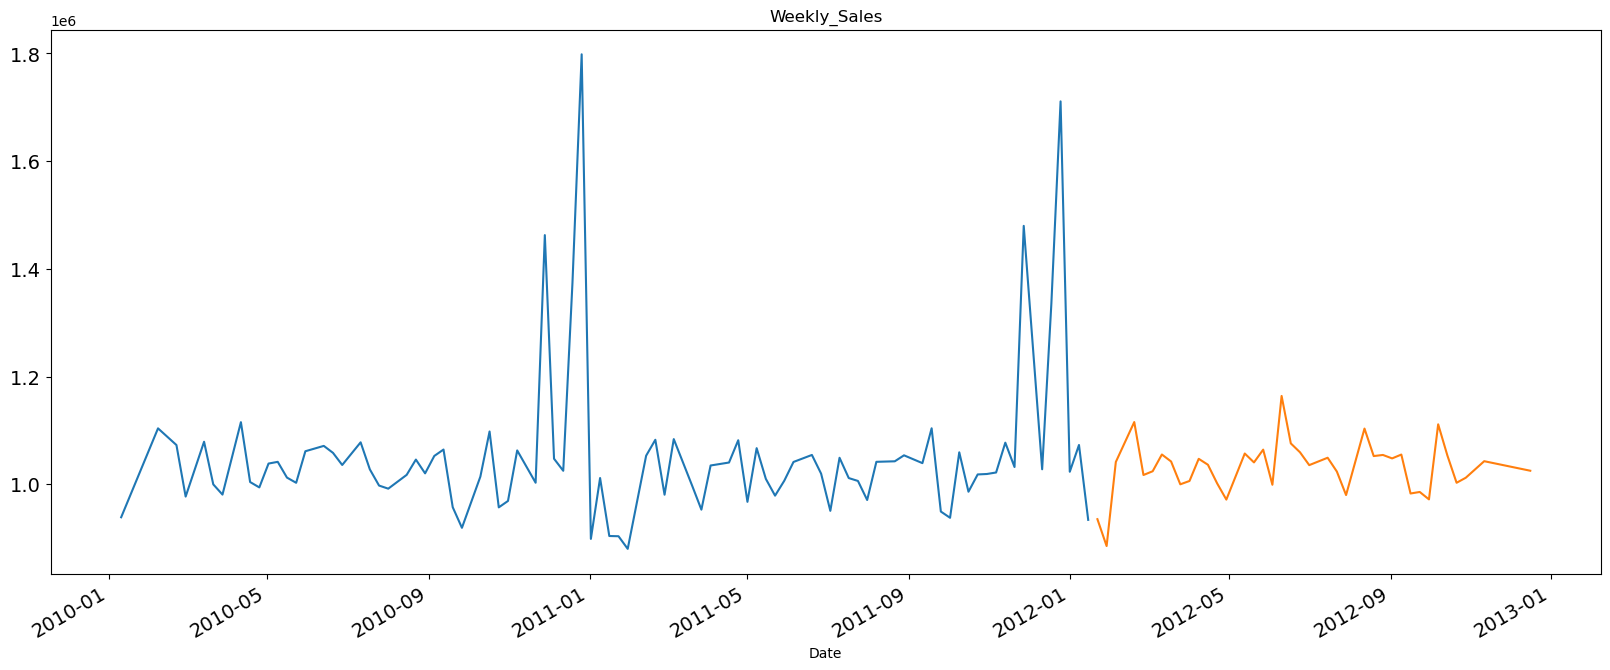

In [160]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [134]:
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

In [341]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

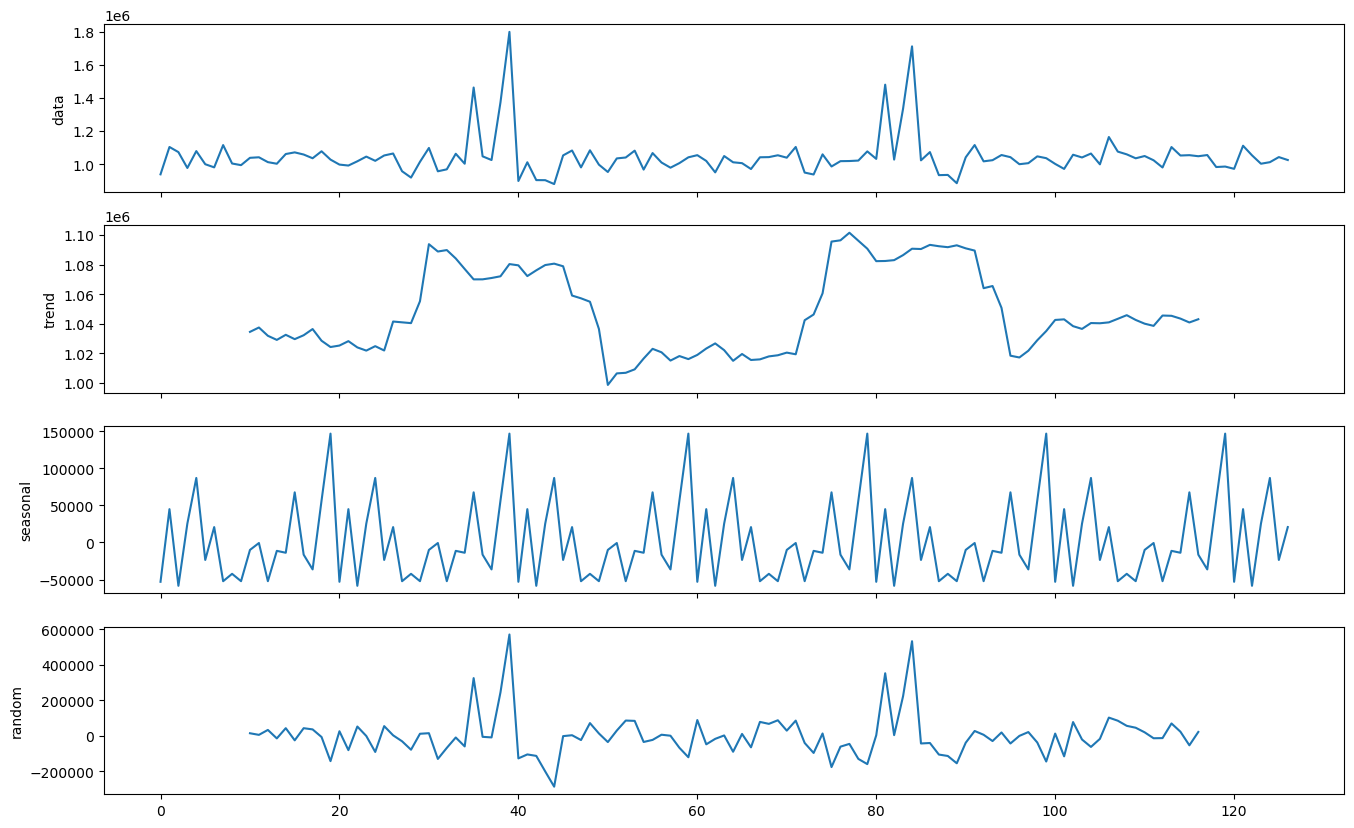

In [342]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()


Trying To Make Data More Stationary

# 1.Difference

In [137]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [138]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

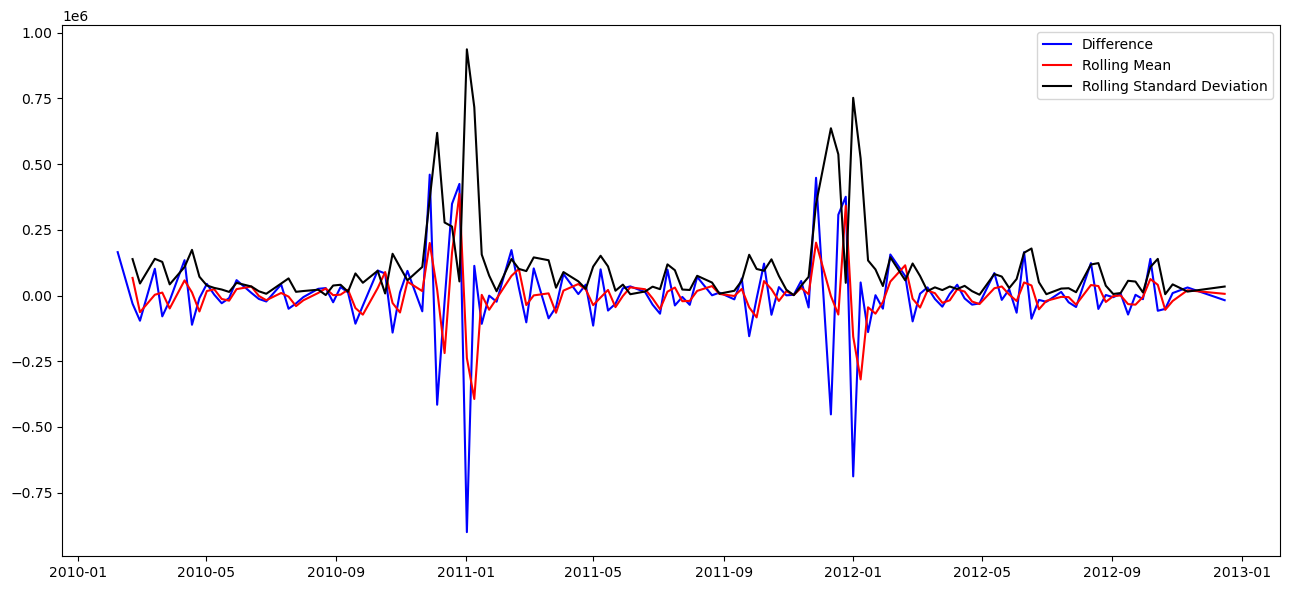

In [139]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# 2.Shift

In [141]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [142]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

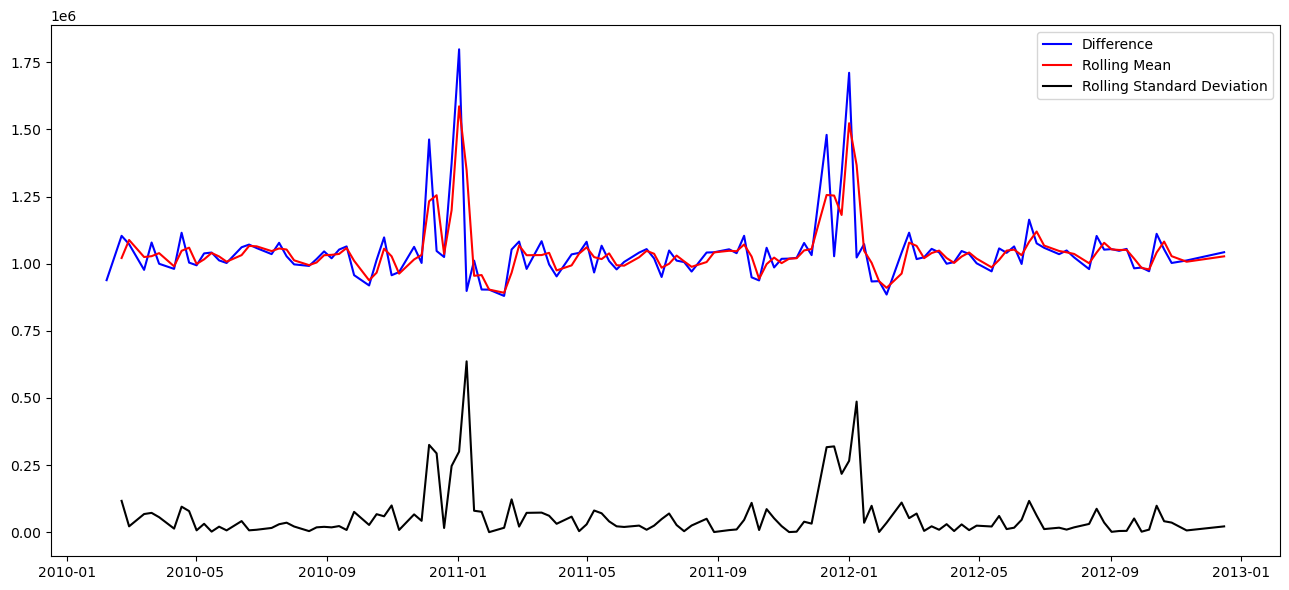

In [143]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# 3.Log

In [144]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [145]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

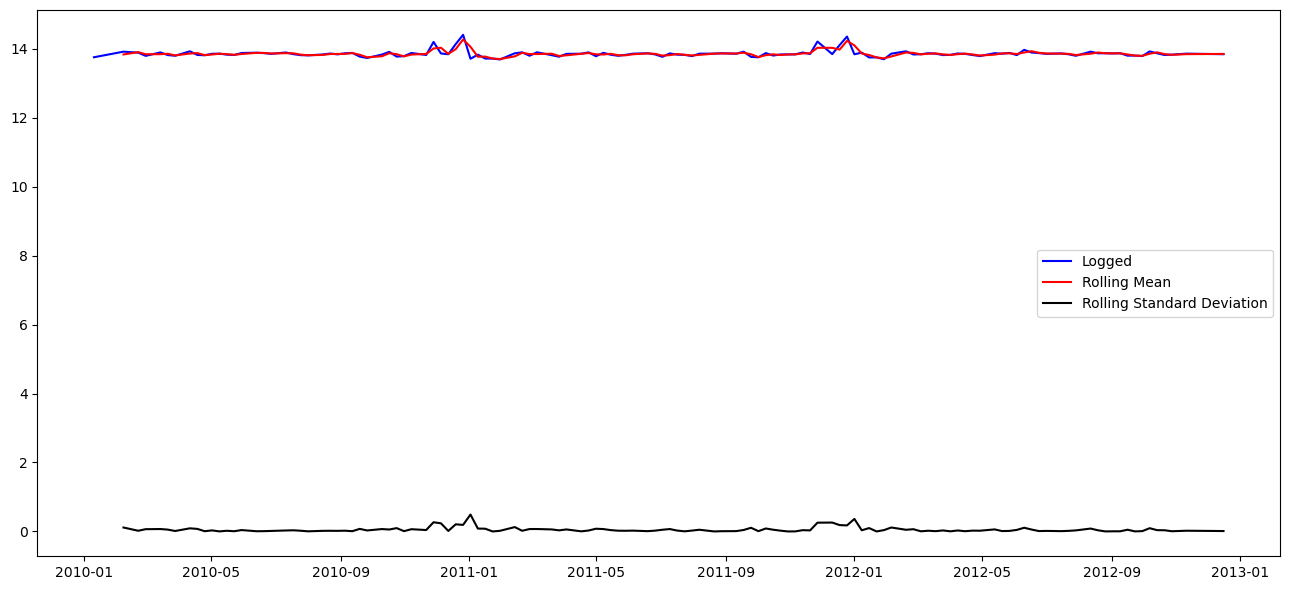

In [146]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# Train-Test Split

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [153]:
from pmdarima.arima import auto_arima

In [154]:

# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=2387.840, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2354.835, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2352.411, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2354.882, Time=0.19 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2359.850, Time=0.10 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2363.398, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=2373.523, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=2355.159, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=2354.321, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=2356.419, Time=0.39 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=2361.387, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=2356.968, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=2356.032, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)

ARIMA(maxiter=200, order=(0, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [182]:
test_data1 = test_data.drop('2012-12-16')

In [262]:
a=pd.DataFrame(y_pred,columns=['Prediction'])
a.reset_index(inplace=True)
a.drop(columns='index',inplace=True)
a.head(2)

,Prediction
0,118074.699587
1,22019.220479


In [275]:
b=pd.DataFrame(test_data.index)
b.shape

(39, 1)

In [264]:
b['Prediction']=a
y_pred=b
y_pred

,Date,Prediction
0,2012-01-22,118074.699587
1,2012-01-29,22019.220479
2,2012-02-05,529.725039
3,2012-02-19,529.725039
4,2012-02-26,529.725039
5,2012-03-04,529.725039
6,2012-03-11,529.725039
7,2012-03-18,529.725039
8,2012-03-25,529.725039
9,2012-04-01,529.725039


In [278]:
b['prediction'] = a

In [283]:
y_pred= b.set_index('Date')
y_pred

,prediction
Date,
2012-01-22,118074.699587
2012-01-29,22019.220479
2012-02-05,529.725039
2012-02-19,529.725039
2012-02-26,529.725039
2012-03-04,529.725039
2012-03-11,529.725039
2012-03-18,529.725039
2012-03-25,529.725039


In [271]:
y_pred.set_index(y_pred['Date'],inplace=True)
y_pred = y_pred.drop(columns='Date')
y_pred

,Prediction
Date,
2012-01-22,118074.699587
2012-01-29,22019.220479
2012-02-05,529.725039
2012-02-19,529.725039
2012-02-26,529.725039
2012-03-04,529.725039
2012-03-11,529.725039
2012-03-18,529.725039
2012-03-25,529.725039


In [205]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))

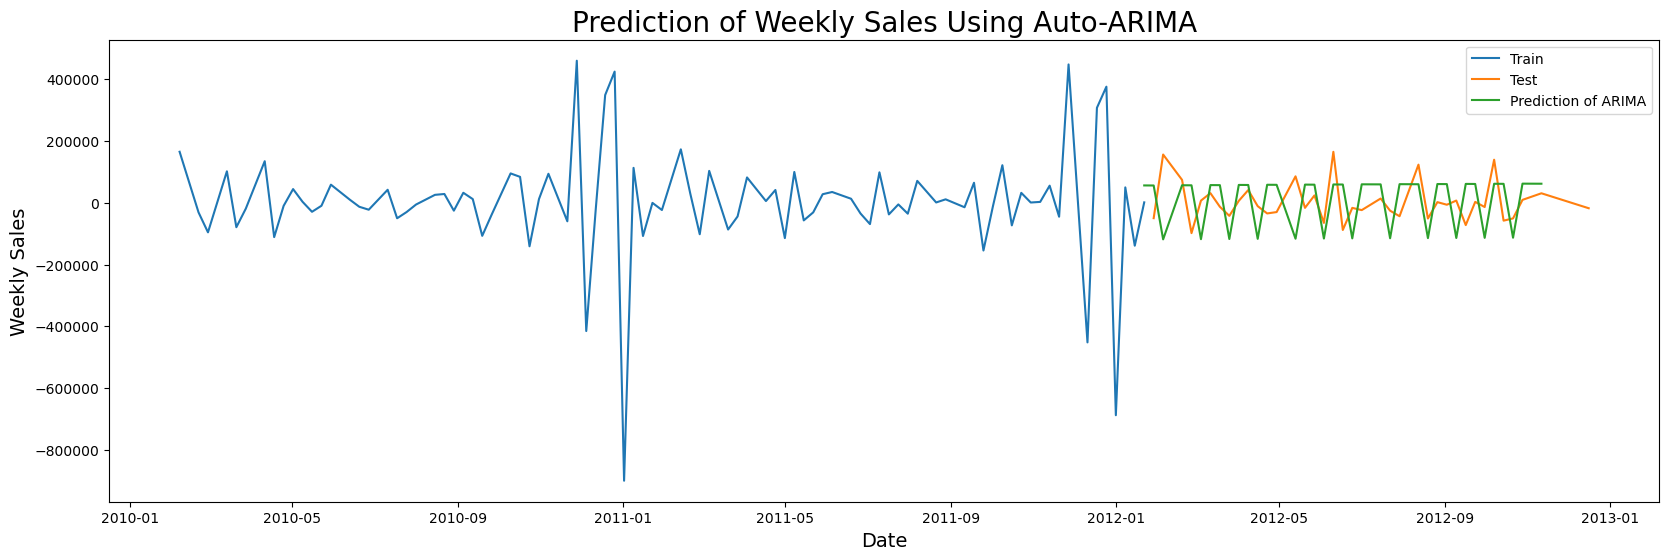

In [343]:

plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [552]:
mae = mean_absolute_error(test_data1,y_pred)
print(f'mean absolute error : {mae}')

mean absolute error : 998697.7584425133


In [557]:
rmse = np.sqrt(mean_squared_error(test_data1,y_pred))
print(f'RMSE : {rmse}')

RMSE : 1001645.8325732024


# Exponential Smoothening

In [286]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

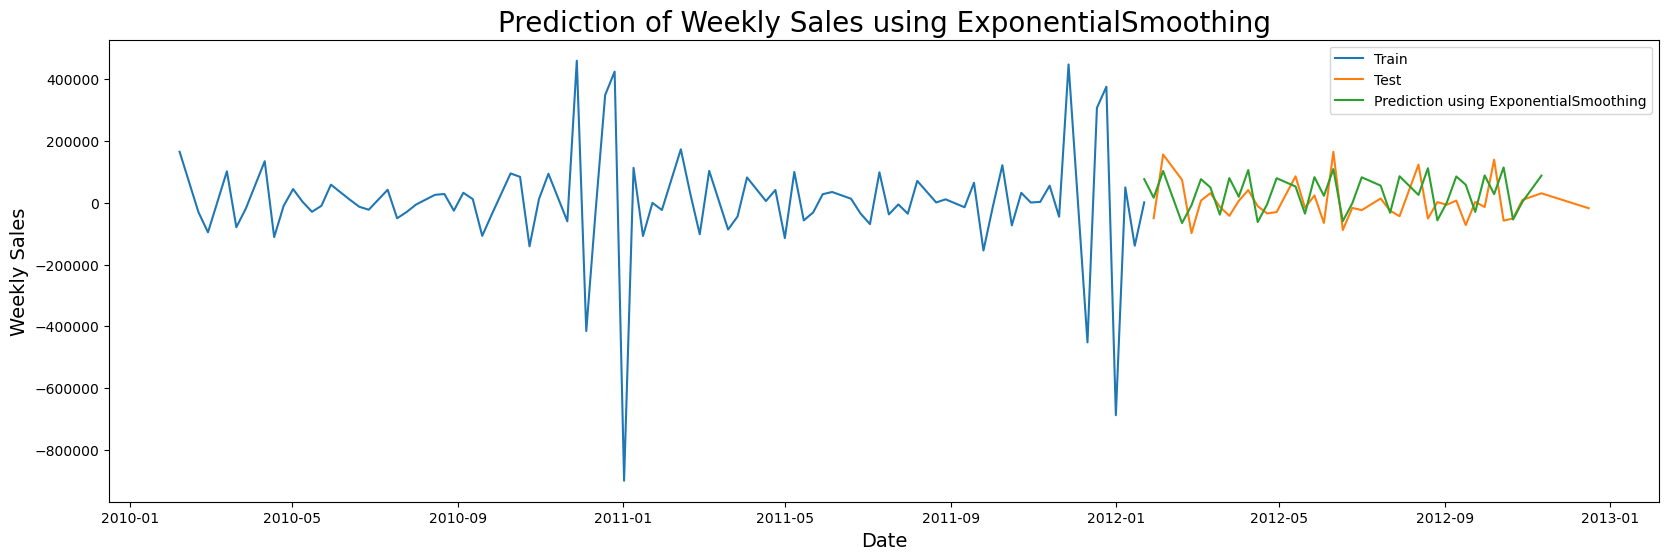

In [430]:

model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=8, seasonal='add',
                                           trend='additive',damped=True).fit(smoothing_level=0.8) #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))
y_pred= y_pred.reset_index()
y_pred = y_pred.drop(columns='index')
test_data_index = pd.DataFrame(test_data1.index)
y_pred['Date'] = test_data_index['Date']
y_pred=y_pred.set_index('Date')

# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

# Smoothening Data

In [466]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [468]:
df1=data['Weekly_Sales']
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    predict = model.fittedvalues # in-built function 
    df1 = pd.DataFrame({'actual':data, 'forecast':predict})
    return(model,df1)

In [472]:
d_simple_exp = {}
alpha_parameter = [0, 0.2,0.4, 0.6, 0.8]

for i in alpha_parameter:
    model, df = simplesmoothing(df1,i)
    d_simple_exp[a] = df.forecast

In [473]:
model.forecast(12)

6435    752465.849374
6436    752465.849374
6437    752465.849374
6438    752465.849374
6439    752465.849374
6440    752465.849374
6441    752465.849374
6442    752465.849374
6443    752465.849374
6444    752465.849374
6445    752465.849374
6446    752465.849374
dtype: float64

In [477]:
df['error']=df['actual']-df['forecast']
df

,actual,forecast,error
0,1643690.90,1.643691e+06,0.000000
1,1641957.44,1.643691e+06,-1733.460000
2,1611968.17,1.642304e+06,-30335.962000
3,1409727.59,1.618035e+06,-208307.772400
4,1554806.68,1.451389e+06,103417.535520
...,...,...,...
6430,713173.95,7.212061e+05,-8032.142256
6431,733455.07,7.147804e+05,18674.691549
6432,734464.36,7.297201e+05,4744.228310
6433,718125.53,7.335155e+05,-15389.984338


In [508]:
# absolute error
abs_error=np.abs(df.error)
abs_error

0            0.000000
1         1733.460000
2        30335.962000
3       208307.772400
4       103417.535520
            ...      
6430      8032.142256
6431     18674.691549
6432      4744.228310
6433     15389.984338
6434     39077.903132
Name: error, Length: 6435, dtype: float64

In [532]:
mse = mean_absolute_error(df['actual'],df['forecast'])
print(f'mean absolute error is: {mse}')


mean absolute error is: 85772.94002720233


Double Exponent Smoothening

In [517]:
df1 = df['actual']

In [518]:
model = ExponentialSmoothing(df1,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
df1 = pd.DataFrame({'actual':df1, 'forecast':f_dexp})

In [520]:
model.forecast(12)

6435    744698.455690
6436    752143.650554
6437    759588.845417
6438    767034.040280
6439    774479.235143
6440    781924.430007
6441    789369.624870
6442    796814.819733
6443    804260.014596
6444    811705.209460
6445    819150.404323
6446    826595.599186
dtype: float64

In [525]:
df1['error']=df1['actual']-df1['forecast']
df1

,actual,forecast,error
0,1643690.90,1.591302e+06,52389.305818
1,1641957.44,1.593819e+06,48138.855224
2,1611968.17,1.600299e+06,11668.799227
3,1409727.59,1.600653e+06,-190925.435494
4,1554806.68,1.541395e+06,13411.390279
...,...,...,...
6430,713173.95,7.092062e+05,3967.722106
6431,733455.07,7.121626e+05,21292.494996
6432,734464.36,7.207131e+05,13751.233809
6433,718125.53,7.291305e+05,-11005.018522


In [649]:
mean_absolute_error(df1['actual'],df1['forecast'])

124679.86151971002

In [652]:
mse = mean_squared_error(df1['actual'],df1['forecast'])
mse

48091039231.32929

In [653]:
RMSE = np.sqrt(mse)
print(f'RMSE : {RMSE}')

RMSE : 219296.6922489468


In [657]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,Month,Day,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,50
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,42


In [659]:
x = data[['Store', 'Fuel_Price', 'CPI', 'Unemployment','Temperature','Day', 'Month', 'year']]
y = data['Weekly_Sales']

In [660]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [661]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)


In [668]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [680]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

In [681]:
test_acc = r2_score(Y_test,y_pred)
print(f'r2_score : {test_acc}')

r2_score : 0.15924940182701874


In [684]:
mse= mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

MSE : 270696281109.93732
RMSE : 520284.8076870372


Decision Tree

In [690]:
from sklearn.tree import DecisionTreeRegressor

In [691]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)

In [693]:
test_acc = r2_score(Y_test,dt_pred)
print(f'r2_score : {test_acc}')

r2_score : 0.9321409057197982


In [694]:
mse= mean_squared_error(Y_test, dt_pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

MSE : 21848577332.037575
RMSE : 147812.64266644302


Random Forest regression

In [685]:
from sklearn.ensemble import RandomForestRegressor

In [687]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)

In [688]:
rf_test_acc = r2_score(Y_test,rf_pred)
print(f'r2_score : {rf_test_acc}')

r2_score : 0.9574543030465195


In [689]:
mse= mean_squared_error(Y_test, rf_pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

MSE : 13698428484.695518
RMSE : 117040.28573399638


Random Forest is the best model,it gives almost 96% of Accuracy